In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [16]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
bos.columns=boston.feature_names

In [11]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
bos['Price']=boston.target

In [13]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#Understanding the Dataset

In [18]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Calculationg VIF factors for multicollinearity & using Heatmap for correlations

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
X=bos.drop(columns=['Price'],axis=1)

#Lets Scale these X values

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
sc=StandardScaler()

In [101]:
X_scaled=sc.fit_transform(X)

In [102]:
vif=pd.DataFrame()

vif['VIF']=[variance_inflation_factor(X_scaled,i) for i in range((X.shape[1]))]

vif['feature']=X.columns

In [103]:
vif

,VIF,feature
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


#Looks like there is a high multicollinearity as VIF is greater than 5

Lets use correlations as well using heatmap among the variables

Finding the correlations using heatmap 

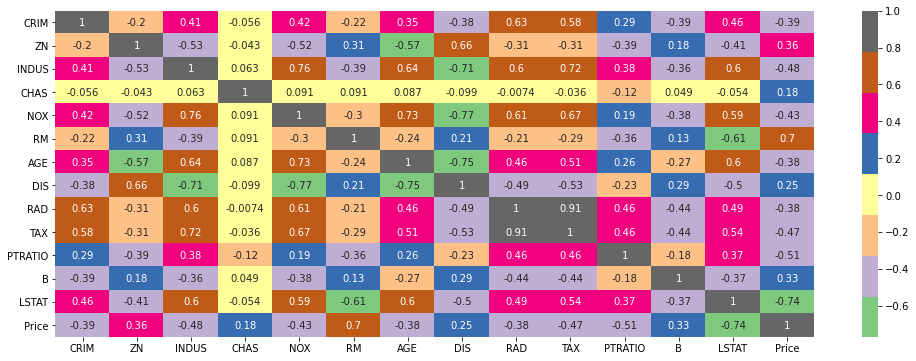

In [94]:
plt.figure(figsize=(17,6))

sns.heatmap(bos.corr(),annot=True,cmap='Accent')
plt.show()

Based on the Observations, we see that "TAX" and "RAD" are highly correlated & we would remove one of them.
Again "INDUS" and  "NOX" are highly correlated & hence we would remove one of them. 
We will drop "RAD" and "NOX" and see the heatmap again & observe. 

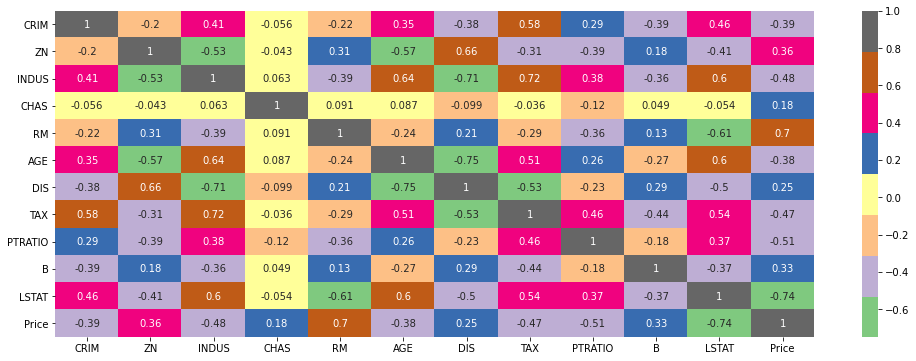

In [93]:
plt.figure(figsize=(17,6))
sns.heatmap(bos.loc[:,['CRIM', 'ZN','INDUS','CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']].corr(),annot=True,cmap='Accent')

plt.show()

Again, "INDUS" & "TAX" are highly correlated & hence we would drop one of them. 

We will drop "INDUS" and see the data again. 

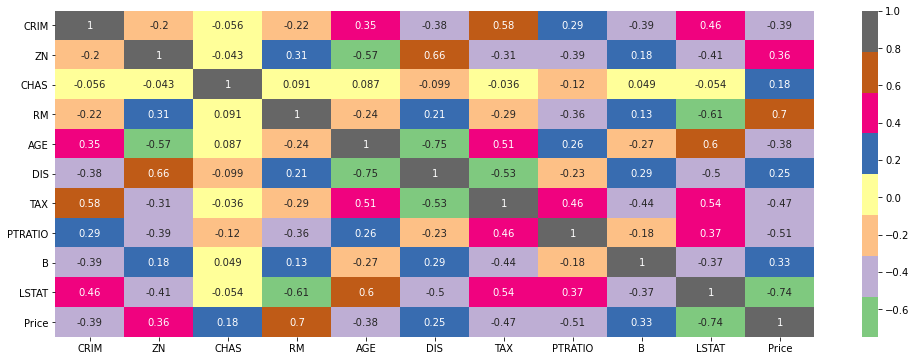

In [92]:
plt.figure(figsize=(17,6))
sns.heatmap(bos.loc[:,['CRIM', 'ZN','CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']].corr(),annot=True,cmap='Accent')

plt.show()

Based on the current varables, we will build our model. 

So we will use the following FEATURE variables - 'CRIM', 'ZN','CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'

Taget variable - 'Price'

In [104]:
XF=bos.loc[:,['CRIM', 'ZN','CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

In [105]:
Y=bos['Price']

#We will split our data into train & test model using OLS method using sklearn 

In [106]:
from sklearn.model_selection import train_test_split

In [110]:
train_X,test_X,train_Y,test_Y=train_test_split(XF,Y,test_size=.3,random_state=100)

MOdel Building

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
Linr=LinearRegression()

In [113]:
Linr.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
Coeff=pd.DataFrame(Linr.coef_,columns=['Coeff'])

In [119]:
Coeff['Values']=XF.columns

In [120]:
Coeff

,Coeff,Values
0,-0.017606,CRIM
1,0.038402,ZN
2,2.960931,CHAS
3,4.315796,RM
4,-0.028900,AGE
5,-1.124803,DIS
6,-0.006049,TAX
7,-0.716211,PTRATIO
8,0.011019,B
9,-0.445857,LSTAT


In [122]:
Intercept=Linr.intercept_

In [123]:
print(Intercept)

18.460529917095613


#Calculating R2 Score for the Training Dataset

In [124]:
from sklearn.metrics import r2_score

In [128]:
r2_score(train_Y,Linr.predict(train_X))

0.7356703242743952

Calculating R2 Score for the Testing Dataset

In [129]:
r2_score(test_Y,Linr.predict(test_X))

0.6750229794811724

#We don't see a significant difference between Training & Testing Datasets in terms of Accuracy 

#& we will proceed with the current model. 

The END